# Euro to USD Conversion - Time Series Analysis Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\harsh\Downloads\BOE-XUDLERD.csv")
df.head()

,Date,Value
0,2017-11-09,0.8603
1,2017-11-08,0.8631
2,2017-11-07,0.8639
3,2017-11-06,0.8631
4,2017-11-03,0.8608


## Exploratory Data Analysis(EDA)

In [3]:
df.shape

(10837, 2)

In [4]:
df.isna().sum()

Date     0
Value    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.dtypes

Date      object
Value    float64
dtype: object

In [7]:
df.describe()

,Value
count,10837.000000
mean,0.864988
std,0.153289
min,0.626000
25%,0.759800
50%,0.826300
75%,0.920300
max,1.551900


## Data Preprocessing

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [9]:
df = df.set_index('Date')
df.head()

,Value
Date,
2017-11-09,0.8603
2017-11-08,0.8631
2017-11-07,0.8639
2017-11-06,0.8631
2017-11-03,0.8608


## Data Processing & Visualization

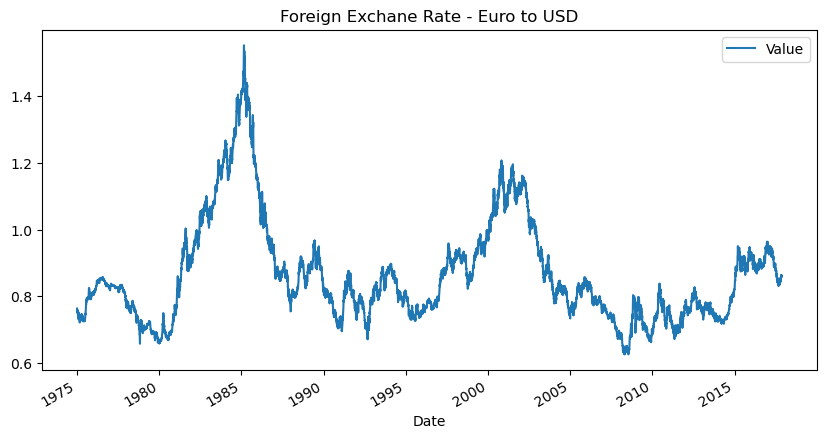

In [10]:
df.plot(figsize = (10,5))
plt.title('Foreign Exchane Rate - Euro to USD')
# plt.savefig('Foreign Exchane Rate - Euro to USD.png')
plt.show()

_**Resampling the dataset to weekly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observations after resampling and displaying the first five records of the resampled dataset**_

In [11]:
df_week = df.resample('W').mean()
print('Counts of the Weekly DataFrame : ',df_week.shape[0])
df_week.head()

Counts of the Weekly DataFrame :  2237


,Value
Date,
1975-01-05,0.76090
1975-01-12,0.75346
1975-01-19,0.75546
1975-01-26,0.74388
1975-02-02,0.73902


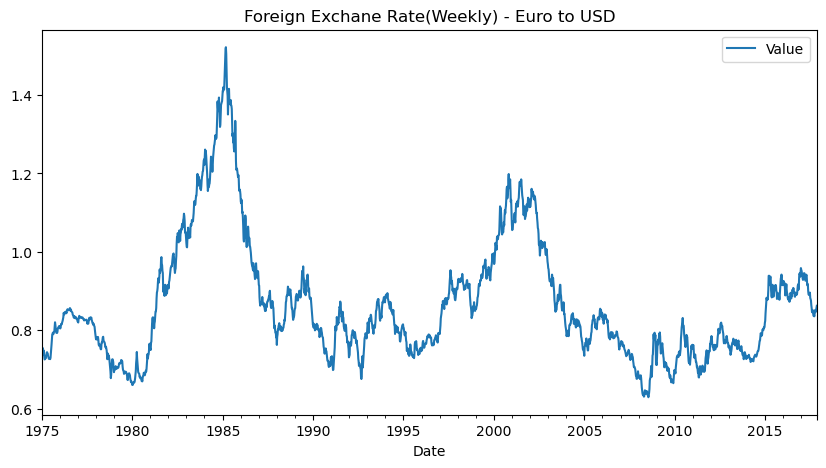

In [12]:
df_week.plot(figsize = (10,5))
plt.title('Foreign Exchane Rate(Weekly) - Euro to USD')
# plt.savefig('Foreign Exchane Rate(Weekly) - Euro to USD.png')
plt.show()

_**Resampling the dataset to monthly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observations after resampling and displaying the first five records of the resampled dataset**_

In [13]:
df_month = df.resample('M').mean()
print('Counts of the Monthly DataFrame : ',df_month.shape[0])
df_month.head()

Counts of the Monthly DataFrame :  515


,Value
Date,
1975-01-31,0.749132
1975-02-28,0.737910
1975-03-31,0.730337
1975-04-30,0.741623
1975-05-31,0.731286


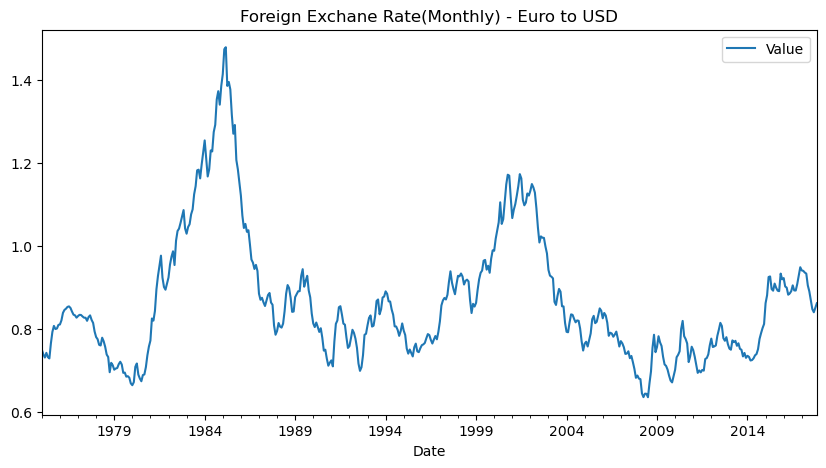

In [14]:
df_month.plot(figsize = (10,5))
plt.title('Foreign Exchane Rate(Monthly) - Euro to USD')
# plt.savefig('Foreign Exchane Rate(Monthly) - Euro to USD.png')
plt.show()

_**Resampling the dataset to Yearly frequency since the given data has more number of observations that takes longer time to fit or predict the model. And along with that showing number of observations after resampling and displaying the first five records of the resampled dataset**_

In [15]:
df_year = df.resample('Y').mean()
print('Counts of the Yearly DataFrame : ',df_year.shape[0])
df_year.head()

Counts of the Yearly DataFrame :  43


,Value
Date,
1975-12-31,0.766268
1976-12-31,0.837672
1977-12-31,0.823871
1978-12-31,0.747492
1979-12-31,0.697025


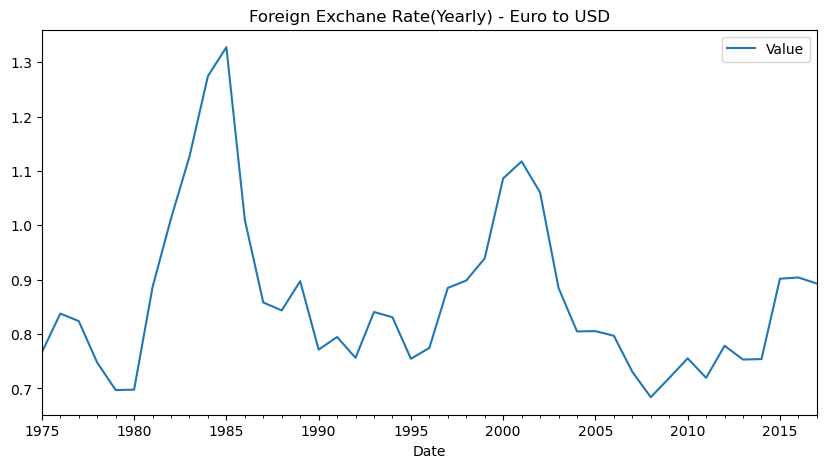

In [16]:
df_year.plot(figsize = (10,5))
plt.title('Foreign Exchane Rate(Yearly) - Euro to USD')
#plt.savefig('Foreign Exchane Rate(Yearly) - Euro to USD.png')
plt.show()

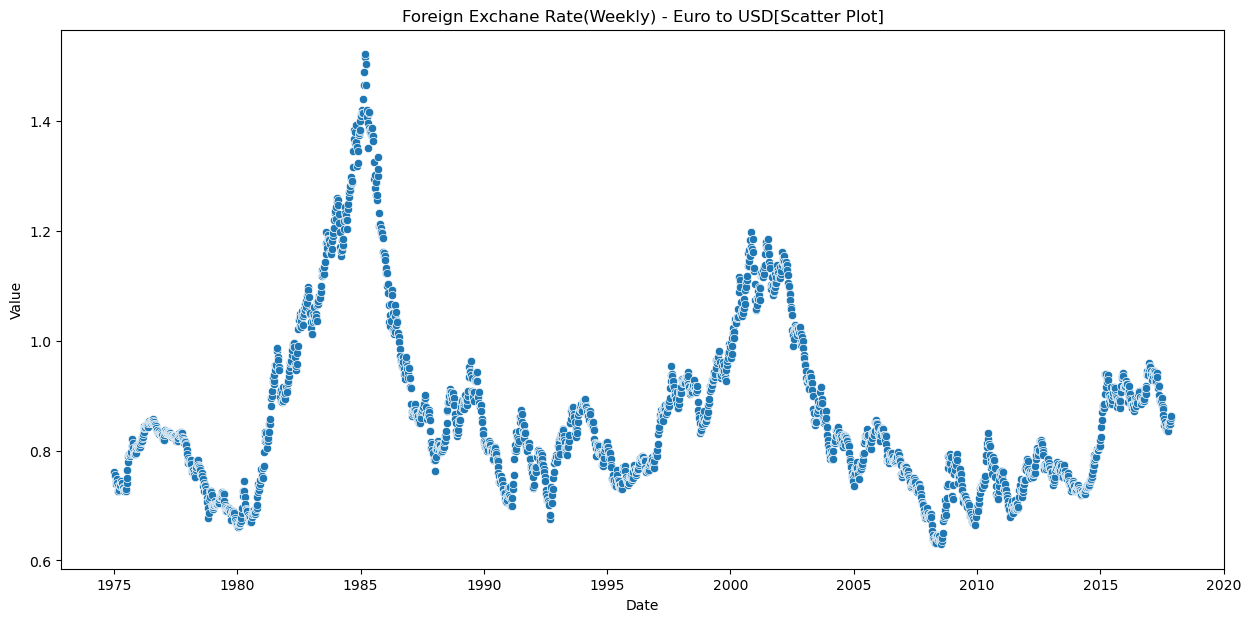

In [17]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = df_week.index, y = df_week.Value)
plt.title('Foreign Exchane Rate(Weekly) - Euro to USD[Scatter Plot]')
#plt.savefig('Foreign Exchane Rate(Weekly) - Euro to USD[Scatter Plot].png')
plt.show()

_**Plotting the bar graph using seaborn to show the data spread in the resampled weekly data**_

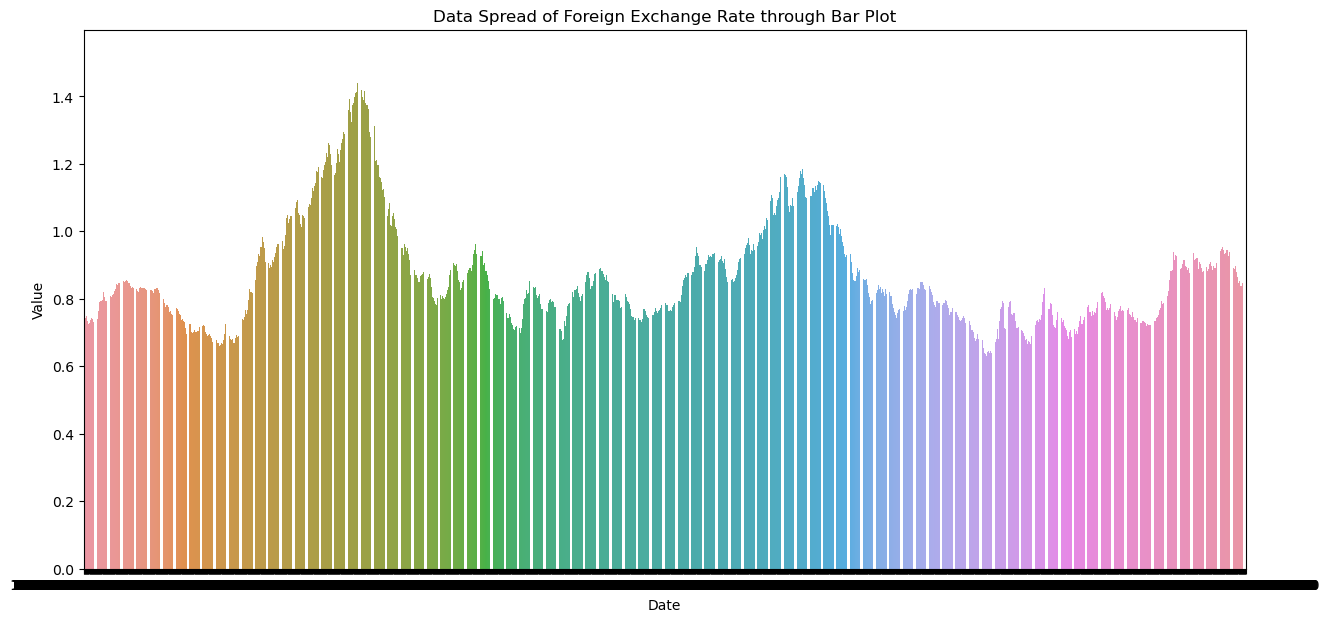

In [18]:
sns.barplot(data = df_week, x = df_week.index, y = df_week.Value)
plt.title('Data Spread of Foreign Exchange Rate through Bar Plot')
#plt.savefig('Data Spread of Foreign Exchange Rate through Bar Plot.png')
plt.show()

_**Plotting the dist plot using Seaborn to show the data distribution in the resampled weekly dataset**_

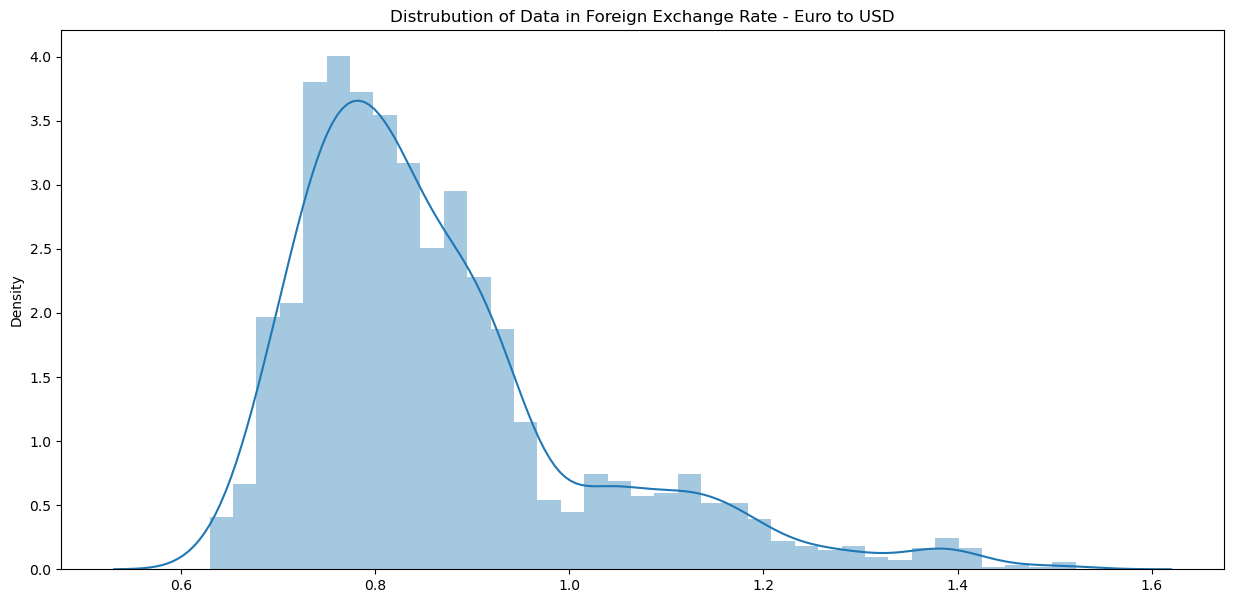

In [19]:
sns.distplot(df_week)
plt.title('Distrubution of Data in Foreign Exchange Rate - Euro to USD')
#plt.savefig('Distrubution of Data in Foreign Exchange Rate - Euro to USD.png')
plt.show()

_**Plotting the histogram and KDE line graph to show the distribution of data in the resampled weekly dataset**_

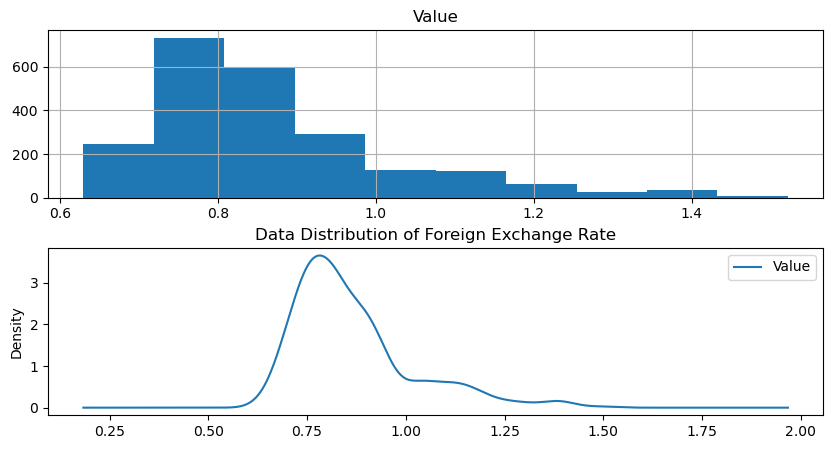

In [20]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10,5))
df_week.hist(ax = ax1)
df_week.plot(kind = 'kde', ax = ax2)
plt.title('Data Distribution of Foreign Exchange Rate')
#plt.savefig('Data Distribution of Foreign Exchange Rate.png')
plt.show()

_**Plotting the graph with "Seasonal Decompose" function to show the Data Description, Trend, Seasonal, Residuals**_

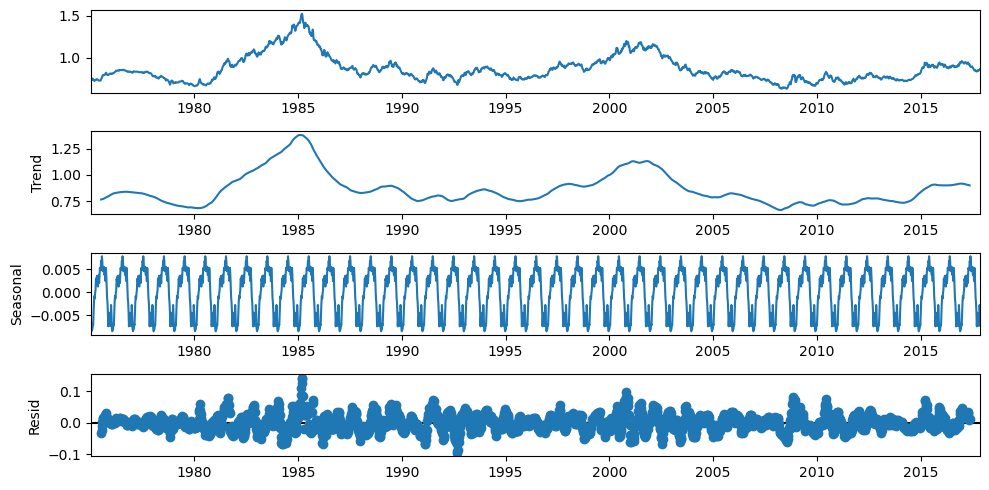

In [21]:
plt.rcParams['figure.figsize'] = (10,5)
decomposition = seasonal_decompose(df_week, period = 52, model = 'additive')
decomposition.plot()
#plt.savefig('Trend, Seasonal, Residual Graph.png')
plt.show()

_**Plotting the graphs with Auto-Correlation and Partial Auto-Correlation of the data from the resampled weekly dataset**_

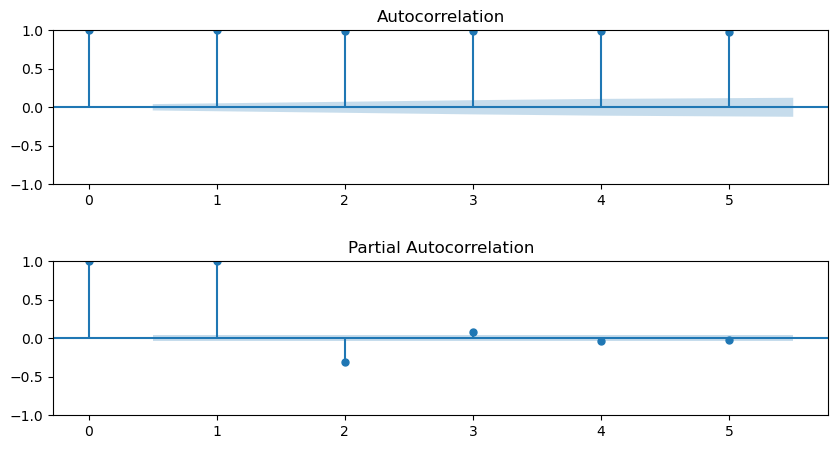

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10,5))
ax1 = plot_acf(df_week, lags = 5, ax = ax1)
ax2 = plot_pacf(df_week, lags = 5, ax = ax2)
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('ACF & PACF.png')
plt.show()

## Data Transformation

_**The `adf_check()` function performs an Augmented Dickey-Fuller test on a time series. The test is used to determine whether a time series is stationary or not. If the p-value of the test is less than or equal to 0.05, then there is strong evidence against the null hypothesis, and the series is considered to be stationary. Otherwise, the series is considered to be non-stationary. The function takes a time series as input and returns the results of the test. The results are printed to the console, along with a message indicating whether the series is stationary or not.**_

In [23]:
def adf_check (time_series):
    result = adfuller (time_series)
    print ('Augmented Dickey Fuller Test :')
    labels = ['ADF Test Statistics', 'P Value', 'Number of Lags Used','Number of Observations']
    for value, label in zip(result, labels):
        print (label +' : '+ str (value))
    if result [1] <= 0.05:
        print ('Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary ')
    else:
        print ('Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary ')

_**Performing the Augmented Dickey-Fuller test on the original data in the resampled weekly dataset to find whether the time series is stationary or not**_

In [24]:
adf_check(df_week)

Augmented Dickey Fuller Test :
ADF Test Statistics : -2.0763405999329914
P Value : 0.25413395509267367
Number of Lags Used : 2
Number of Observations : 2234
Weak evidence against the null hypothesis, hence ACCEPT null hypothesis and the series is Not Stationary 


In [25]:
df_week.diff()

,Value
Date,
1975-01-05,NaN
1975-01-12,-0.00744
1975-01-19,0.00200
1975-01-26,-0.01158
1975-02-02,-0.00486
...,...
2017-10-15,-0.00554
2017-10-22,0.00170
2017-10-29,0.00528


_**Since the Time Series is Not Stationary, the resampled weekly dataset is transformed as a new DataFrame with First Difference to make it as a Stationary Series. Along with that showing the number of observations in the new DataFrame and displaying the first five records of the new DataFrame**_

In [26]:
df1_week = df_week.diff().dropna()
print('Counts of the Weekly First Difference DataFrame  : ',df1_week.shape[0])
df1_week.head()

Counts of the Weekly First Difference DataFrame  :  2236


,Value
Date,
1975-01-12,-0.00744
1975-01-19,0.00200
1975-01-26,-0.01158
1975-02-02,-0.00486
1975-02-09,0.01004


_**Performing again the Augmented Dickey-Fuller test on the new transformed data from the resampled weekly dataset to find whether the time series is stationary or not**_

In [27]:
adf_check(df1_week)

Augmented Dickey Fuller Test :
ADF Test Statistics : -30.12898660128547
P Value : 0.0
Number of Lags Used : 1
Number of Observations : 2234
Strong evidence against the null hypothesis, hence REJECT null hypothesis and the series is Stationary 


_**Plotting the line graph to show the data trend in the transformed data from the resampled weekly dataset**_

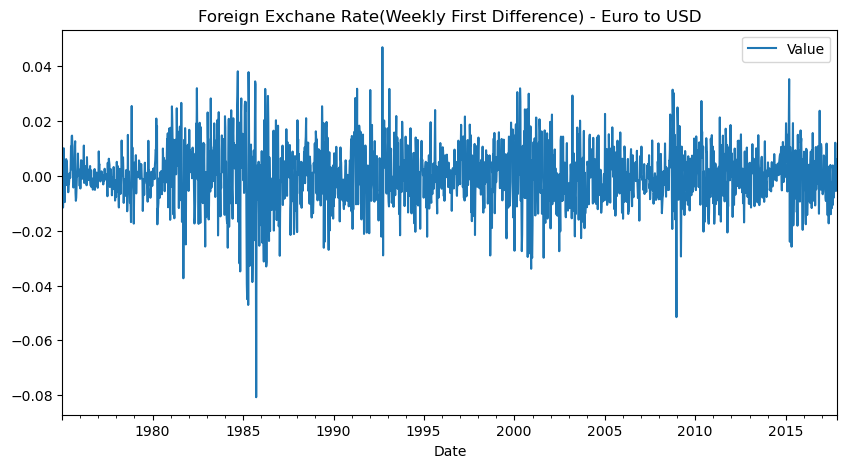

In [28]:
df1_week.plot(figsize = (10,5))
plt.title('Foreign Exchane Rate(Weekly First Difference) - Euro to USD')
#plt.savefig('Foreign Exchane Rate(Weekly First Difference) - Euro to USD.png')
plt.show()

_**Plotting the graph with pandas plotting autocorrelation_plot to show the difference between the Stationary Data and Non-Stationary Datae**_

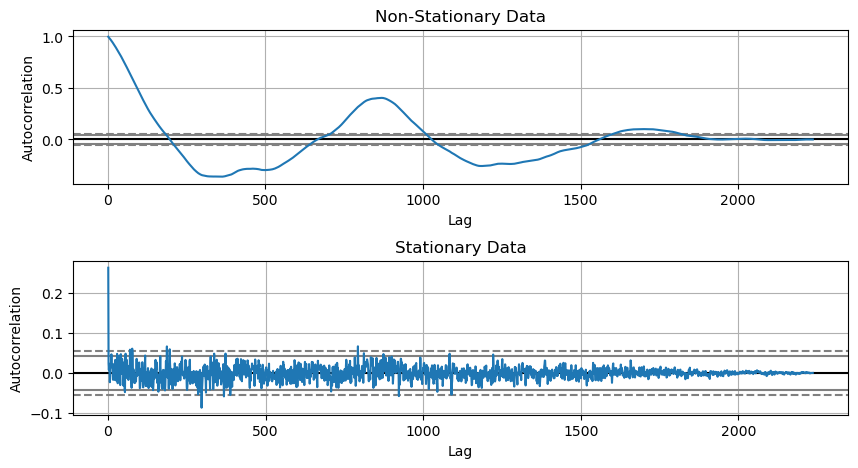

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = False, sharey = False, figsize = (10,5))
ax1 = autocorrelation_plot(df_week, ax = ax1)
ax1.set_title('Non-Stationary Data')
ax2 = autocorrelation_plot(df1_week, ax = ax2)
ax2.set_title('Stationary Data')
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Autocorrelation_plot of Stationary & Non-Stationary.png')
plt.show()

In [30]:
size = int(len(df_week)*0.80)
train, test = df_week[0:size]['Value'], df_week[size:(len(df_week))]['Value']
print('Counts of the Train Data : ',train.shape[0])
print('Counts of the Test Data : ',test.shape[0])

Counts of the Train Data :  1789
Counts of the Test Data :  448


## Model Fitting

_**Getting the p value and q value for the model fitting using `auto_arima` function by passing through some needed parameters, the best model is evaluated by least Akaike Information Criterion[AIC]**_ 

In [31]:
model = auto_arima(train, m = 52, d = 1, seasonal = False, max_order = 8, test = 'adf', trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-11200.922, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11076.407, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11202.617, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11205.851, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11078.407, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11204.960, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11204.961, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11202.961, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-11207.738, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-11206.960, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-11206.957, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-11204.617, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-11204.958, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.811 seco

_**Defining the summary of the model fitted with `auto_arima` function, here getting various information such as Akaike Information Criterion[AIC], Bayesian Information Criterion[BIC}, Hannan-Quinn Information Criterion[HQIC], Log Likelihood etc. from which we can evaluate the model**_

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1789
Model:               SARIMAX(0, 1, 1)   Log Likelihood                5605.869
Date:                Tue, 03 Oct 2023   AIC                         -11207.738
Time:                        00:12:01   BIC                         -11196.760
Sample:                    01-05-1975   HQIC                        -11203.685
                         - 04-12-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2769      0.017     16.284      0.000       0.244       0.310
sigma2         0.0001   2.46e-06     44.983      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               516.09
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.21
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

_**Fitting the model in ARIMA model with the best value got from `auto_arima` model in the resampled weekly data and getting the summary of the fitted model**_

In [34]:
arima = ARIMA(train, order = (0,1,1))
result = arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                 1789
Model:                 ARIMA(0, 1, 1)   Log Likelihood                5605.869
Date:                Tue, 03 Oct 2023   AIC                         -11207.738
Time:                        00:12:19   BIC                         -11196.760
Sample:                    01-05-1975   HQIC                        -11203.685
                         - 04-12-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2769      0.017     16.284      0.000       0.244       0.310
sigma2         0.0001   2.46e-06     44.983      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               516.09
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.21
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

_**Plotting the Diagnostic plot for the fitted model to show the best fit of the model and saving it as PNG file**_

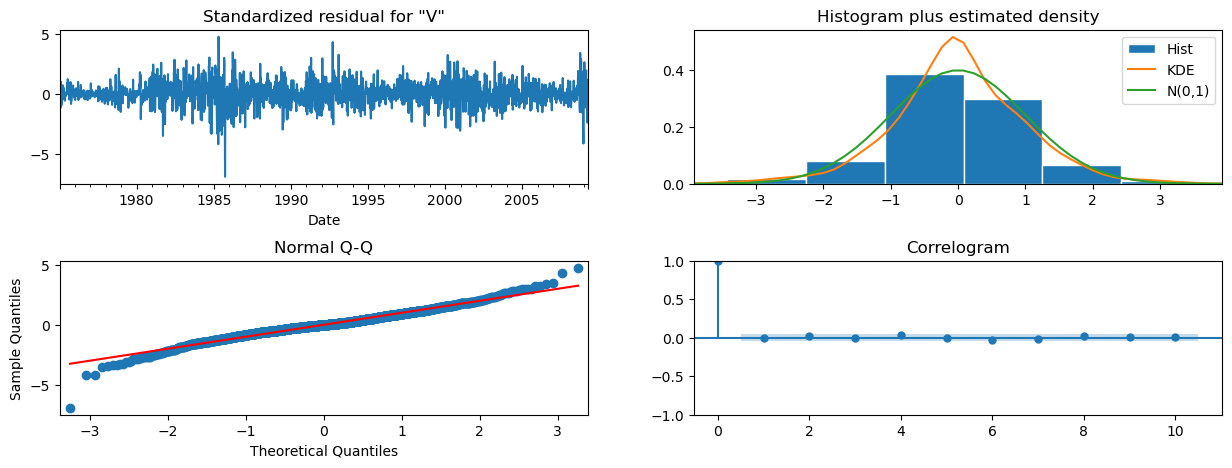

In [35]:
result.plot_diagnostics(figsize = (15,5))
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Diagnostic Plot of Best Model')
plt.show()

## Model Testing

In [36]:
start = len(train)
end = len(train) + len(test) - 1
predictions = result.predict(start=start,end=end,dynamic=False,typ='levels')

_**Evaluating the model with the following metrics such asPercentage of R2 Score, Mean Squared Error, Root Mean Squared Error, Mean Absolute Error and Mean Absolute Percentage Error for the predicted value and test data**_

In [37]:
print('Evaluation Results for Test Data : \n')
print(' Percenatge of R2 Score : {0:.2f} %'.format(100*(r2_score(test,predictions))),'\n')
print(' Mean Squared Error : %.6f'%(mean_squared_error(test,predictions)),'\n')
print(' Root Mean Squared Error : ',sqrt(mean_squared_error(test,predictions)),'\n')
print(' Mean Absolute Error : ',mean_absolute_error(test,predictions),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,predictions)),'\n')

Evaluation Results for Test Data : 

 Percenatge of R2 Score : -30.97 % 

 Mean Squared Error : 0.008389 

 Root Mean Squared Error :  0.09159309359003466 

 Mean Absolute Error :  0.0685950159740381 

 Mean Absolute Percentage Error : 8.07 % 



_**Making the predicted value as Series and index as same as Test data index since the prediction is based on Test Data**_

In [38]:
predictions_arima = pd.Series(predictions, index = test.index)

_**Plotting the graph with predicted data and the resampled weekly data and saving it as PNG file**_

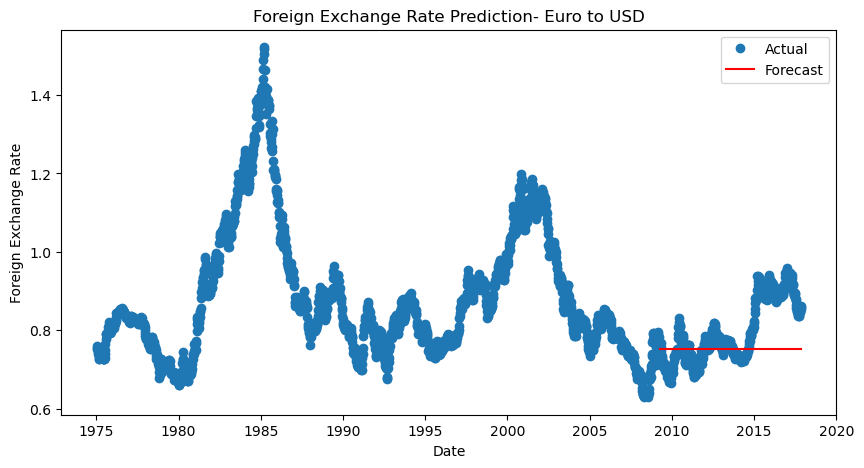

In [40]:
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction- Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_arima, 'r', label='Forecast')
legend = ax.legend(loc='upper right')
legend.get_frame().set_facecolor('w')
#plt.savefig('Foreign Exchange Rate Prediction- Euro to USD.png')

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
tes = ExponentialSmoothing(train,trend='additive',seasonal='additive',
                              initialization_method='estimated',seasonal_periods=52)
result1 = model1.fit()

In [44]:
result1.summary()

Dep. Variable:,Value,No. Observations:,1789
Model:,ExponentialSmoothing,SSE,0.206
Optimized:,True,AIC,-16110.990
Trend:,Additive,BIC,-15803.583
Seasonal:,Additive,AICC,-16107.034
Seasonal Periods:,52,Date:,"Tue, 03 Oct 2023"
Box-Cox:,False,Time:,00:13:43
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.0000000,alpha,True
smoothing_trend,0.0248481,beta,True


In [45]:
start = len(train)
end = len(train) + len(test) - 1
predictions_tes = result1.forecast(448)

In [46]:
print('Evaluation Results for Test Data : \n')
print(' Percenatge of R2 Score : {0:.2f} %'.format(100*(r2_score(test,predictions_tes))),'\n')
print(' Mean Squared Error : %.6f'%(mean_squared_error(test,predictions_tes)),'\n')
print(' Root Mean Squared Error : ',sqrt(mean_squared_error(test,predictions_tes)),'\n')
print(' Mean Absolute Error : ',mean_absolute_error(test,predictions_tes),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,predictions_tes)),'\n')

Evaluation Results for Test Data : 

 Percenatge of R2 Score : -62.68 % 

 Mean Squared Error : 0.010421 

 Root Mean Squared Error :  0.102083365296934 

 Mean Absolute Error :  0.09054917036861301 

 Mean Absolute Percentage Error : 11.66 % 



In [48]:
predictions_df_tes = pd.Series(predictions_tes, index = test.index)

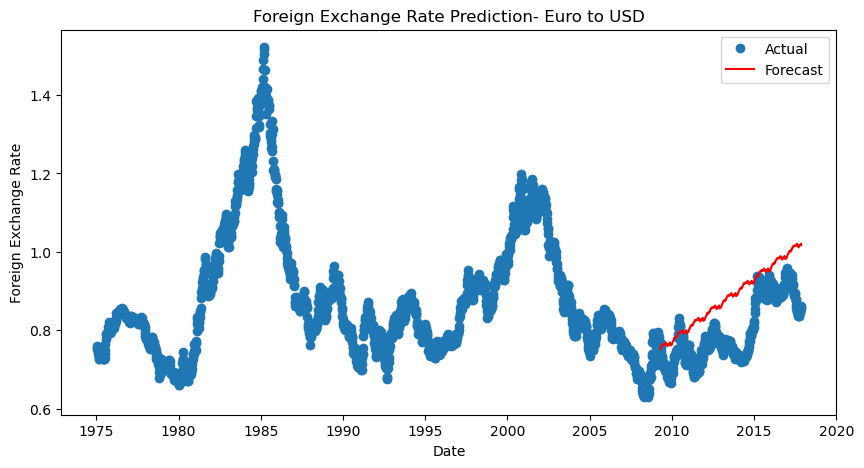

In [49]:
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction- Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_df_tes, 'r', label='Forecast')
legend = ax.legend(loc='upper right')
legend.get_frame().set_facecolor('w')
#plt.savefig('Foreign Exchange Rate Prediction- Euro to USD.png')

In [50]:
sarima_model = auto_arima(train,start_p=0,start_q=0,max_p=3,max_q=3,start_P=0,start_Q=0,max_P=3,max_Q=3,m=52,d=1,
                          seasonal=True,trace=True,stepwise=True,
           error_action='ignore',suppress_warnings=True)
sarima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=-11076.407, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=-11200.610, Time=5.71 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=-11203.909, Time=8.38 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=-11078.407, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=-11205.851, Time=0.73 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=-11203.909, Time=7.65 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=-11201.882, Time=16.00 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=-11204.960, Time=0.44 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=-11204.961, Time=0.42 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=-11202.617, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=-11202.961, Time=0.43 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=-11207.738, Time=0.17 sec
 ARIMA(0,1,1)(1,0,0)[52]             : AIC=-11205.735, Time=1.62 sec
 ARIMA(0,1,1)(0,0,1)[52]             : AIC=-11205.670, Time

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1789
Model:               SARIMAX(0, 1, 1)   Log Likelihood                5605.869
Date:                Tue, 03 Oct 2023   AIC                         -11207.738
Time:                        00:15:56   BIC                         -11196.760
Sample:                    01-05-1975   HQIC                        -11203.685
                         - 04-12-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2769      0.017     16.284      0.000       0.244       0.310
sigma2         0.0001   2.46e-06     44.983      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               516.09
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.21
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1789
Model:               SARIMAX(0, 1, 1)   Log Likelihood                5605.869
Date:                Tue, 03 Oct 2023   AIC                         -11207.738
Time:                        00:15:56   BIC                         -11196.760
Sample:                    01-05-1975   HQIC                        -11203.685
                         - 04-12-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2769      0.017     16.284      0.000       0.244       0.310
sigma2         0.0001   2.46e-06     44.983      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               516.09
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.21
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, order = (0,1,1),seasonal_order=(0,0,0,12))
result2 = sarima.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                 1789
Model:               SARIMAX(0, 1, 1)   Log Likelihood                5605.869
Date:                Tue, 03 Oct 2023   AIC                         -11207.738
Time:                        00:15:56   BIC                         -11196.760
Sample:                    01-05-1975   HQIC                        -11203.685
                         - 04-12-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2769      0.017     16.284      0.000       0.244       0.310
sigma2         0.0001   2.46e-06     44.983      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               516.09
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.21
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

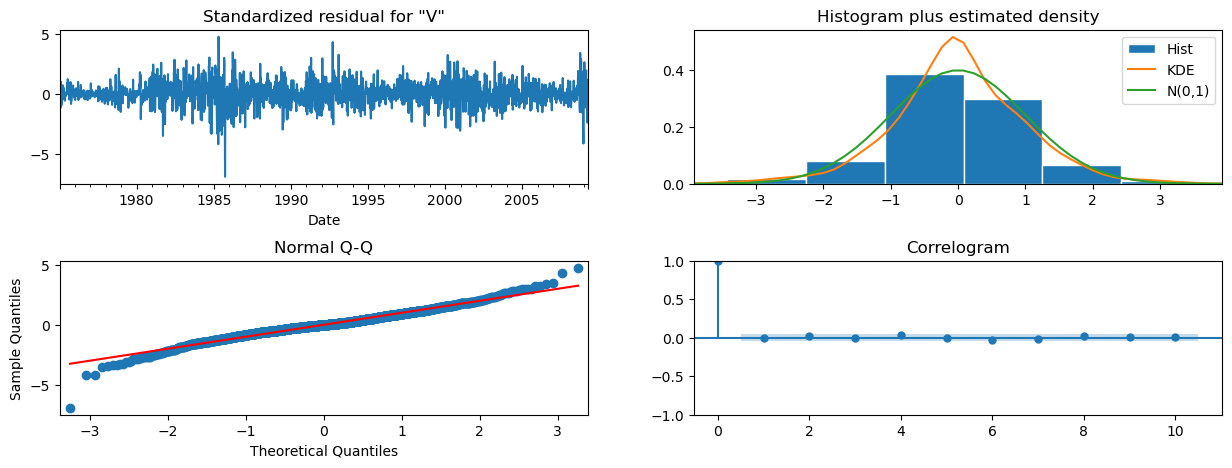

In [53]:
result2.plot_diagnostics(figsize = (15,5))
plt.subplots_adjust(hspace = 0.5)
#plt.savefig('Diagnostic Plot of Best Model')
plt.show()

In [54]:
start = len(train)
end = len(train) + len(test) - 1
predictions_sarima = result2.predict(start=start,end=end,dynamic=False,typ='levels')

In [55]:
print('Evaluation Results for Test Data : \n')
print(' Percenatge of R2 Score : {0:.2f} %'.format(100*(r2_score(test,predictions_sarima))),'\n')
print(' Mean Squared Error : %.6f'%(mean_squared_error(test,predictions_sarima)),'\n')
print(' Root Mean Squared Error : ',sqrt(mean_squared_error(test,predictions_sarima)),'\n')
print(' Mean Absolute Error : ',mean_absolute_error(test,predictions_sarima),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(test,predictions_sarima)),'\n')

Evaluation Results for Test Data : 

 Percenatge of R2 Score : -30.97 % 

 Mean Squared Error : 0.008389 

 Root Mean Squared Error :  0.09159309359003466 

 Mean Absolute Error :  0.0685950159740381 

 Mean Absolute Percentage Error : 8.07 % 



In [57]:
predictions_df_sarima = pd.Series(predictions_sarima, index = test.index)

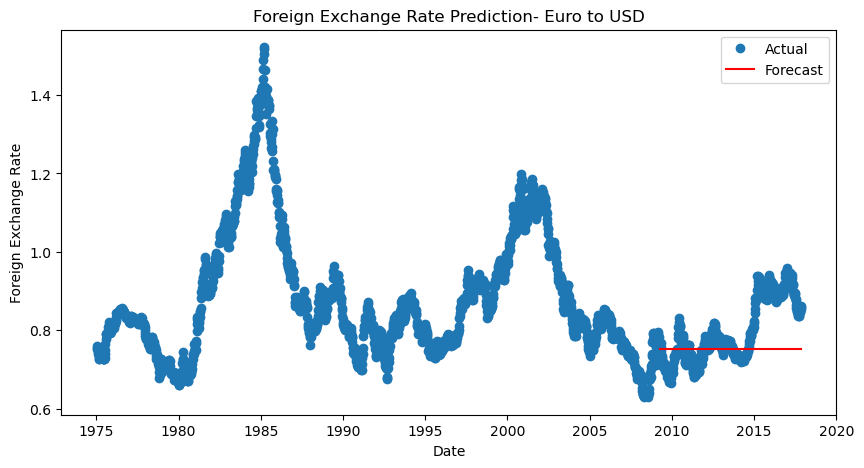

In [58]:
fig, ax = plt.subplots()
ax.set(title='Foreign Exchange Rate Prediction- Euro to USD', xlabel='Date', ylabel='Foreign Exchange Rate')
ax.plot(df_week, 'o', label='Actual')
ax.plot(predictions_df_sarima, 'r', label='Forecast')
legend = ax.legend(loc='upper right')
legend.get_frame().set_facecolor('w')
#plt.savefig('Foreign Exchange Rate Prediction- Euro to USD.png')

In [59]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [60]:
# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(df_week.values.reshape(-1, 1))

# Split the dataset into training and test sets (80% for training, 20% for testing)
#train_size = int(len(normalized_data) * 0.8)
train_data = normalized_data[:1790]
test_data = normalized_data[1790:]

In [61]:
# Function to create input sequences for the LSTM model
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

# Set the sequence length for input sequences
sequence_length = 52

# Create input sequences and corresponding labels for the training set
train_x, train_y = create_sequences(train_data, sequence_length)

# Create input sequences and corresponding labels for the test set
test_x, test_y = create_sequences(test_data, sequence_length)

In [62]:
# Build the LSTM model
lstm = Sequential()
lstm.add(LSTM(100, return_sequences=True, input_shape=(sequence_length, 1)))
lstm.add(LSTM(50))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm.fit(train_x, train_y, epochs=50, batch_size=52, verbose=1)

Epoch 1/50
34/34 [==============================] - 4s 49ms/step - loss: 0.0087
Epoch 2/50
34/34 [==============================] - 2s 50ms/step - loss: 0.0014
Epoch 3/50
34/34 [==============================] - 2s 51ms/step - loss: 0.0012
Epoch 4/50
34/34 [==============================] - 2s 55ms/step - loss: 0.0011
Epoch 5/50
34/34 [==============================] - 2s 51ms/step - loss: 9.7119e-04
Epoch 6/50
34/34 [==============================] - 2s 50ms/step - loss: 9.3706e-04
Epoch 7/50
34/34 [==============================] - 2s 49ms/step - loss: 0.0010
Epoch 8/50
34/34 [==============================] - 2s 48ms/step - loss: 9.4844e-04
Epoch 9/50
34/34 [==============================] - 2s 49ms/step - loss: 8.1138e-04
Epoch 10/50
34/34 [==============================] - 2s 48ms/step - loss: 7.7335e-04
Epoch 11/50
34/34 [==============================] - 2s 48ms/step - loss: 7.8526e-04
Epoch 12/50
34/34 [==============================] - 2s 51ms/step - loss: 7.0447e-04
Epoch 13/

In [63]:
# Make predictions on the test set
predictions_lstm = lstm.predict(test_x)

# Denormalize the predicted values
predictions_lstm = scaler.inverse_transform(predictions_lstm)

# Print the predicted values
for i in range(len(predictions_lstm)):
    print(f"Predicted: {predictions_lstm[i]}, Actual: {scaler.inverse_transform([test_y[i]])}")

13/13 [==============================] - 1s 11ms/step
Predicted: [0.74676055], Actual: [[0.74648]]
Predicted: [0.748248], Actual: [[0.75318]]
Predicted: [0.7530437], Actual: [[0.780425]]
Predicted: [0.7691829], Actual: [[0.79122]]
Predicted: [0.78670204], Actual: [[0.8073]]
Predicted: [0.8044602], Actual: [[0.81386]]
Predicted: [0.81701267], Actual: [[0.820875]]
Predicted: [0.8251826], Actual: [[0.83152]]
Predicted: [0.8330736], Actual: [[0.81116]]
Predicted: [0.8261531], Actual: [[0.81284]]
Predicted: [0.8193553], Actual: [[0.80898]]
Predicted: [0.81386054], Actual: [[0.79212]]
Predicted: [0.80319846], Actual: [[0.7834]]
Predicted: [0.7924856], Actual: [[0.77642]]
Predicted: [0.78387547], Actual: [[0.76864]]
Predicted: [0.7765626], Actual: [[0.75756]]
Predicted: [0.76815706], Actual: [[0.77126]]
Predicted: [0.76999056], Actual: [[0.77982]]
Predicted: [0.7779972], Actual: [[0.78836]]
Predicted: [0.7883375], Actual: [[0.780975]]
Predicted: [0.79094976], Actual: [[0.78356]]
Predicted: [0

In [64]:
actual_lstm=scaler.inverse_transform(test_y)

actual_lstm

array([[0.74648   ],
       [0.75318   ],
       [0.780425  ],
       [0.79122   ],
       [0.8073    ],
       [0.81386   ],
       [0.820875  ],
       [0.83152   ],
       [0.81116   ],
       [0.81284   ],
       [0.80898   ],
       [0.79212   ],
       [0.7834    ],
       [0.77642   ],
       [0.76864   ],
       [0.75756   ],
       [0.77126   ],
       [0.77982   ],
       [0.78836   ],
       [0.780975  ],
       [0.78356   ],
       [0.76896   ],
       [0.75266   ],
       [0.73518   ],
       [0.72166   ],
       [0.71652   ],
       [0.71782   ],
       [0.7202    ],
       [0.71242   ],
       [0.72592   ],
       [0.73582   ],
       [0.74604   ],
       [0.76086   ],
       [0.7548    ],
       [0.75256   ],
       [0.7632    ],
       [0.75316667],
       [0.762275  ],
       [0.76194   ],
       [0.74446   ],
       [0.73098   ],
       [0.73004   ],
       [0.73454   ],
       [0.73846   ],
       [0.72814   ],
       [0.71996   ],
       [0.71972   ],
       [0.714

In [65]:
time=df_week.index[-395:]
time

DatetimeIndex(['2010-04-25', '2010-05-02', '2010-05-09', '2010-05-16',
               '2010-05-23', '2010-05-30', '2010-06-06', '2010-06-13',
               '2010-06-20', '2010-06-27',
               ...
               '2017-09-10', '2017-09-17', '2017-09-24', '2017-10-01',
               '2017-10-08', '2017-10-15', '2017-10-22', '2017-10-29',
               '2017-11-05', '2017-11-12'],
              dtype='datetime64[ns]', name='Date', length=395, freq='W-SUN')

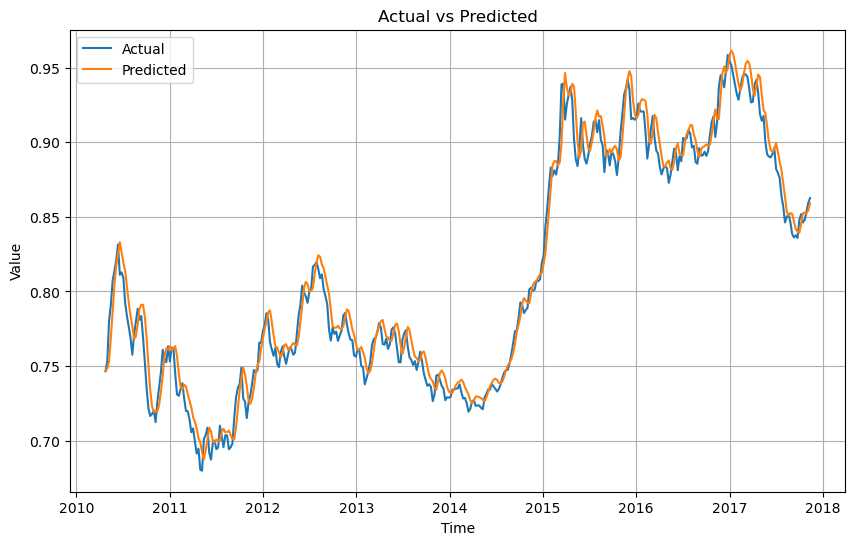

In [66]:
pred_lstm = np.array(predictions_lstm)
actual_lstm = np.array(actual_lstm)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time,actual_lstm, label='Actual')
plt.plot(time,pred_lstm, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.grid()
plt.legend()
plt.show()

In [67]:
time1=df_week.index[:]
time1

DatetimeIndex(['1975-01-05', '1975-01-12', '1975-01-19', '1975-01-26',
               '1975-02-02', '1975-02-09', '1975-02-16', '1975-02-23',
               '1975-03-02', '1975-03-09',
               ...
               '2017-09-10', '2017-09-17', '2017-09-24', '2017-10-01',
               '2017-10-08', '2017-10-15', '2017-10-22', '2017-10-29',
               '2017-11-05', '2017-11-12'],
              dtype='datetime64[ns]', name='Date', length=2237, freq='W-SUN')

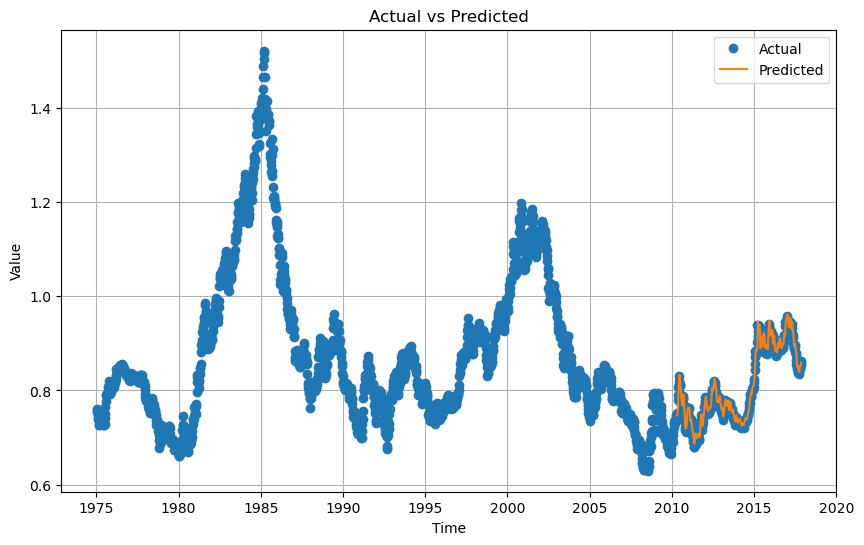

In [68]:
pred_lstm = np.array(predictions_lstm)
actual_lstm = np.array(actual_lstm)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time1,df_week,'o', label='Actual')
plt.plot(time,pred_lstm, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.grid()
plt.legend()
plt.show()

In [69]:
print('Evaluation Results for Test Data : \n')
print(' Percenatge of R2 Score : {0:.2f} %'.format(100*(r2_score(actual_lstm,predictions_lstm))),'\n')
print(' Mean Squared Error : %.6f'%(mean_squared_error(actual_lstm,predictions_lstm)),'\n')
print(' Root Mean Squared Error : ',sqrt(mean_squared_error(actual_lstm,predictions_lstm)),'\n')
print(' Mean Absolute Error : ',mean_absolute_error(actual_lstm,predictions_lstm),'\n')
print(' Mean Absolute Percentage Error : {0:.2f} %'.format(100*mean_absolute_percentage_error(actual_lstm,predictions_lstm)),'\n')

Evaluation Results for Test Data : 

 Percenatge of R2 Score : 97.76 % 

 Mean Squared Error : 0.000134 

 Root Mean Squared Error :  0.011581908221032534 

 Mean Absolute Error :  0.009188029378094245 

 Mean Absolute Percentage Error : 1.14 % 

